# Experiment plotting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pickle
from lib.measures import *
from lib.data import collect_data_from_df
from lib.calibrationSettings import calibration_lockdown_dates, calibration_start_dates, calibration_mob_paths
from lib.calibrationFunctions import get_calibrated_params, downsample_cases
from lib.experiment import Experiment, Plot, Result, get_properties, load_summary_list
from lib.plot import Plotter
from lib.plot import extract_data_from_summary, load_extracted_data

In [3]:
places = [('GER', 'TU'), ('GER', 'RH'), ('GER', 'KL'), ('CH', 'TI'), ('CH', 'BE'), ('CH', 'JU')]

ymax_modelfit = {'GER': {'TU': 1200, 'KL': 800, 'RH': 1000, 'TR': 3500},
                 'CH': {'VD': 2000, 'BE': 600, 'TI': 500, 'JU': 500,}}

# Model Limitations: Tirschenreuth

In [4]:
def plot_model_fit(country, area, ymax):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    if area == 'TR':
        plots = {
            f'model-limitations-{area}' : [
                Plot(label='Simulated case data, full scale', 
                    path=(f'model_limitations/'
                          f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
                Plot(label='Simulated case data, calibration scale', 
                    path=(f'model_limitations/'
                          f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100-downscaled=True.pk')),
            ],
        }
    else:
        plots = {
            f'model-limitations-{area}' : [
                Plot(label='Simulated case data, full scale', 
                    path=(f'continued-lockdown-{country}-{area}/'
                          f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
                Plot(label='Simulated case data, calibration scale', 
                    path=(f'calibration-scenario-downscaled/'
                          f'calibration-scenario-downscaled-{country}-{area}-extended_lockdown_weeks=100.pk')),
                          ],
                          }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # load simulations
        results = load_summary_list(paths)
        sims = get_properties(results, 'metadata')
        summaries = get_properties(results, 'summary')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days        

        mob_settings_paths = calibration_mob_paths[country][area][1]
        with open(mob_settings_paths, 'rb') as fp:
            mob_settings = pickle.load(fp)

        area_cases = collect_data_from_df(country=country,
             area=area,
             datatype='new',
             start_date_string=start_date,
             end_date_string=end_date)

        sim_cases = downsample_cases(area_cases, mob_settings)      # only downscaling due LK data for cities

        plotter.plot_positives_vs_target(
            summaries, labels,
            sim_cases.sum(axis=1),
            title='Calibration period',
            filename=plot_filename,
            figsize=(6, 4),
            start_date=start_date,
            errorevery=1, acc=1000,
            ymax=ymax[country][area],
            lockdown_at=days_until_lockdown,
            lockdown_label='Interventions',
            lockdown_label_y=ymax[country][area]/4
        )



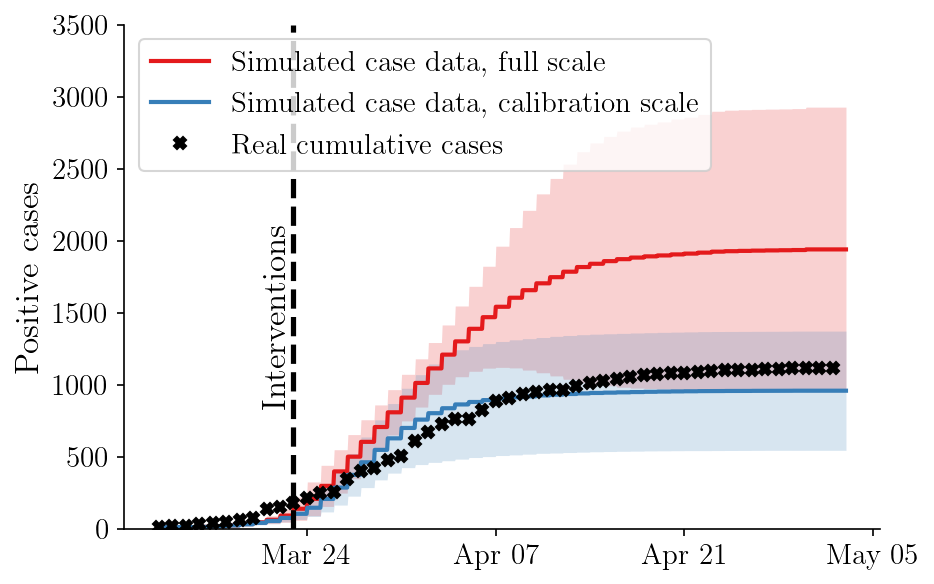

In [5]:
#places2 = places
places2 = [('GER', 'TR')]

for country, area in places2:
    plot_model_fit(country, area, ymax_modelfit)

# Multibeta: Site specific infectiousness parameters

In [6]:
def plot_multibeta_modelfit(country, area, ymax):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'multibeta-modelfit-{country}-{area}' : [
            Plot(label='Simulated COVID-19 case data', 
                path=(f'multibeta/continued-lockdown-{country}-{area}/'
                      f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100-multi_beta_calibration=True.pk')),
            ],
    }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # load simulations
        #results = load_summary_list(paths)
        #sims = get_properties(results, 'metadata')
        #summaries = get_properties(results, 'summary')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days        

        mob_settings_paths = calibration_mob_paths[country][area][1]
        with open(mob_settings_paths, 'rb') as fp:
            mob_settings = pickle.load(fp)

        area_cases = collect_data_from_df(country=country,
             area=area,
             datatype='new',
             start_date_string=start_date,
             end_date_string=end_date)

        sim_cases = downsample_cases(area_cases, mob_settings)      # only downscaling due LK data for cities

        plotter.plot_positives_vs_target(
            paths, 
            labels,
            sim_cases.sum(axis=1),
            title='Calibration period',
            filename=plot_filename,
            figsize=(6, 4),
            start_date=start_date,
            errorevery=1, acc=1000,
            ymax=ymax[country][area],
            lockdown_at=days_until_lockdown,
            lockdown_label='Interventions',
            lockdown_label_y=ymax[country][area]/4,
            n_age_groups=sim_cases.shape[1]
        )
        
        plotter.plot_age_group_positives_vs_target(
            paths[0], 
            sim_cases,
            filename=plot_filename+'-per-age-group',
            figsize=(16, 2.5),
            start_date=start_date,
            errorevery=1, acc=1000,
            ymax=int(ymax[country][area] / 6)
        )


GER TU
Loaded previously extracted data.
Loaded previously extracted data.
GER RH
Loaded previously extracted data.
Loaded previously extracted data.
GER KL
Loaded previously extracted data.
Loaded previously extracted data.
CH TI
Loaded previously extracted data.
Loaded previously extracted data.
CH BE
Loaded previously extracted data.
Loaded previously extracted data.
CH JU
Loaded previously extracted data.
Loaded previously extracted data.


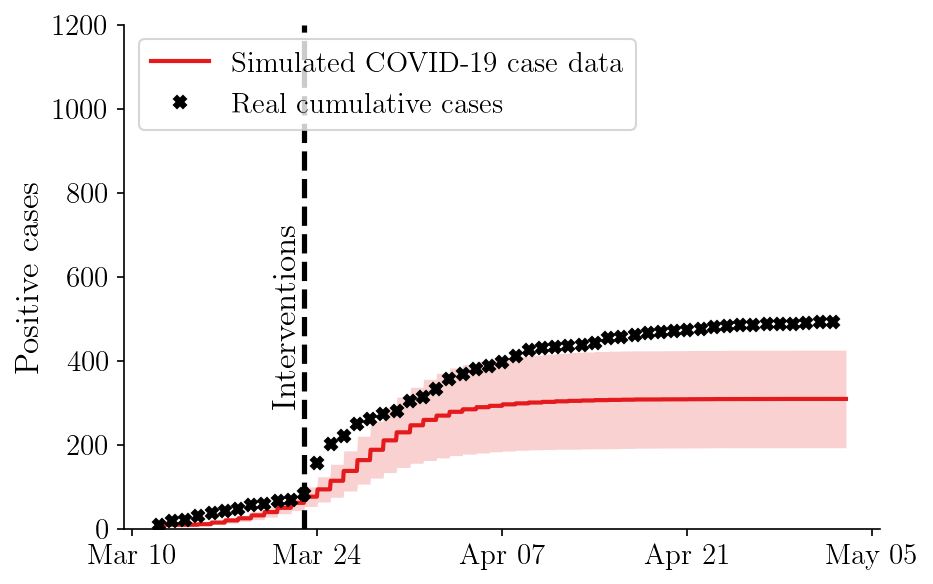

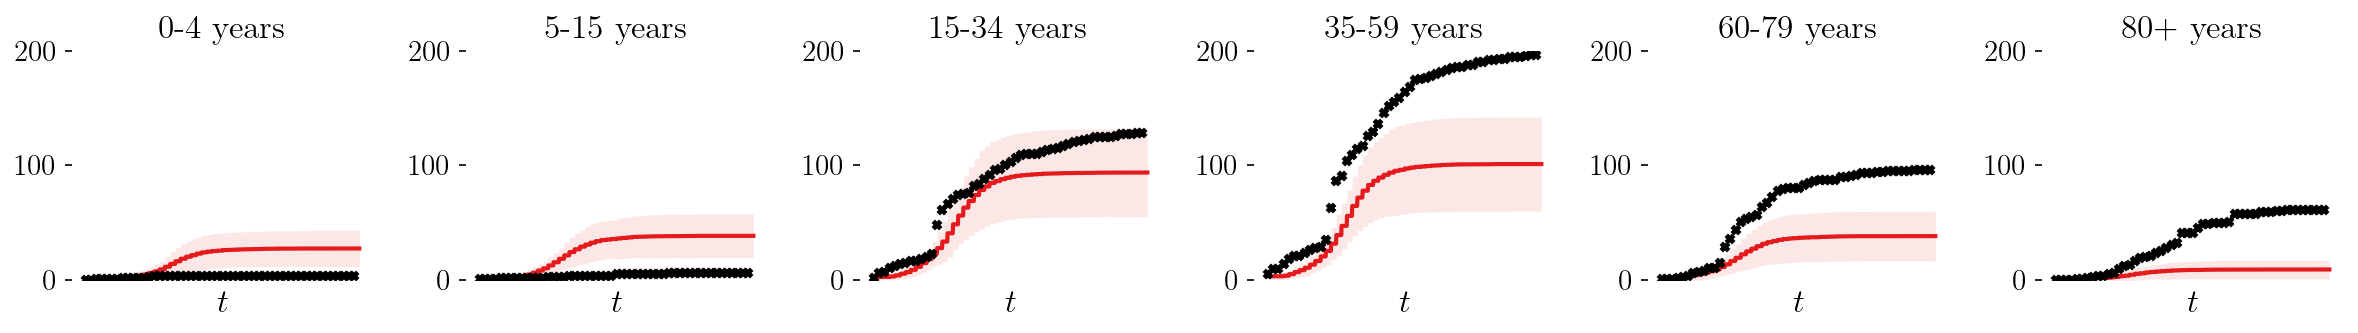

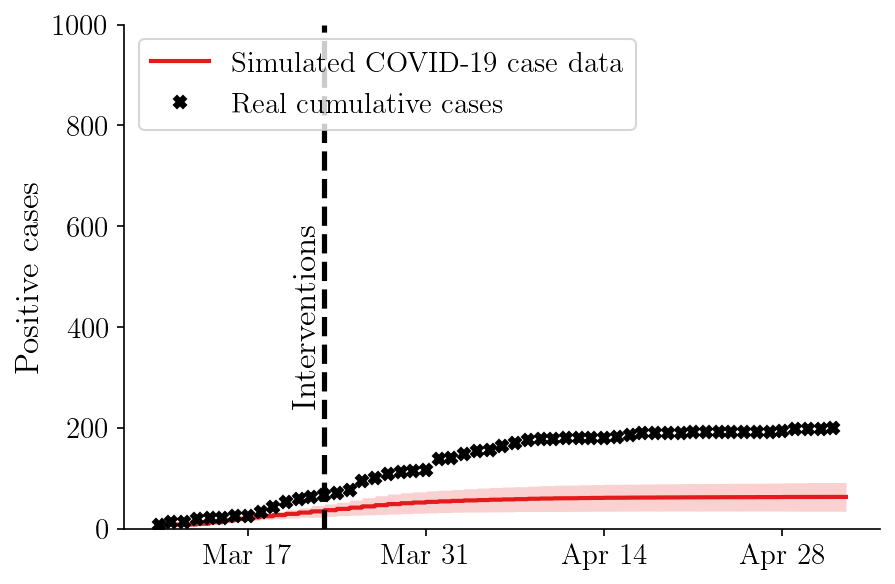

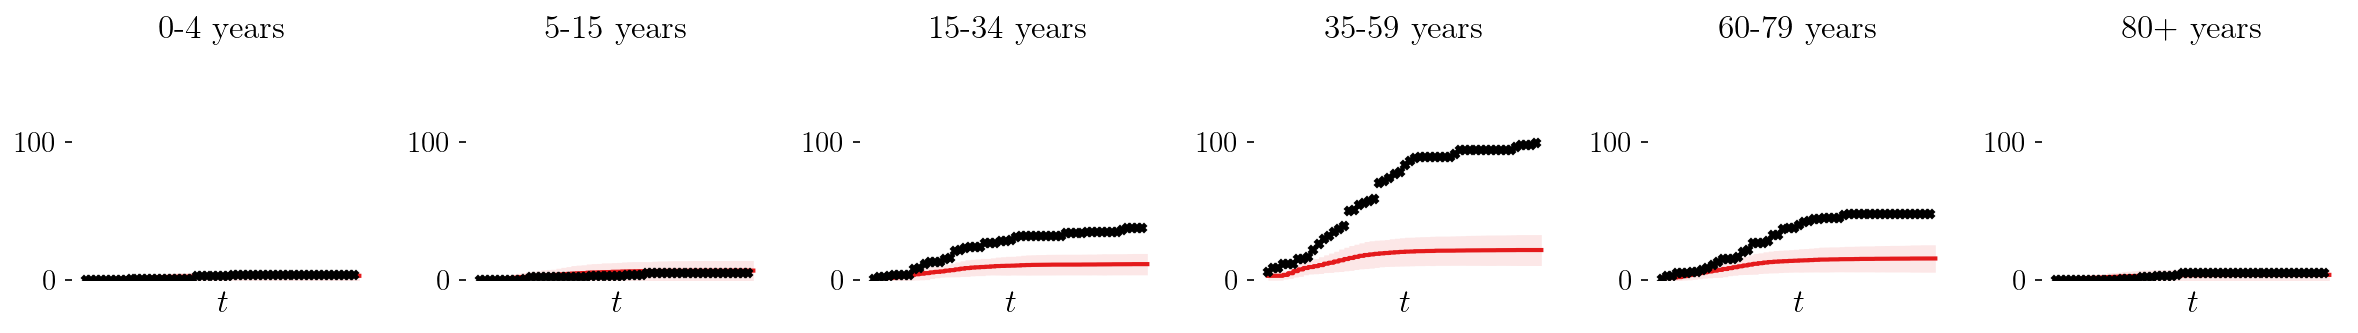

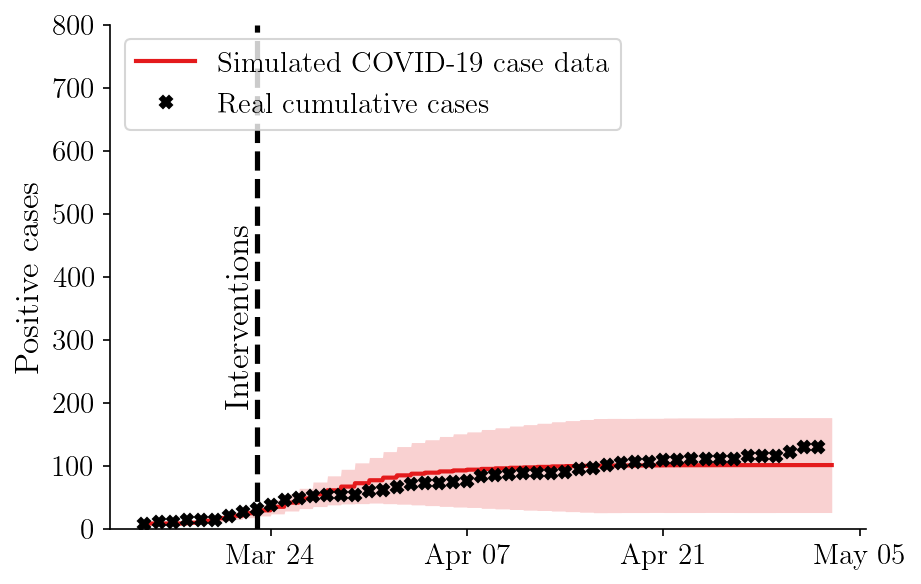

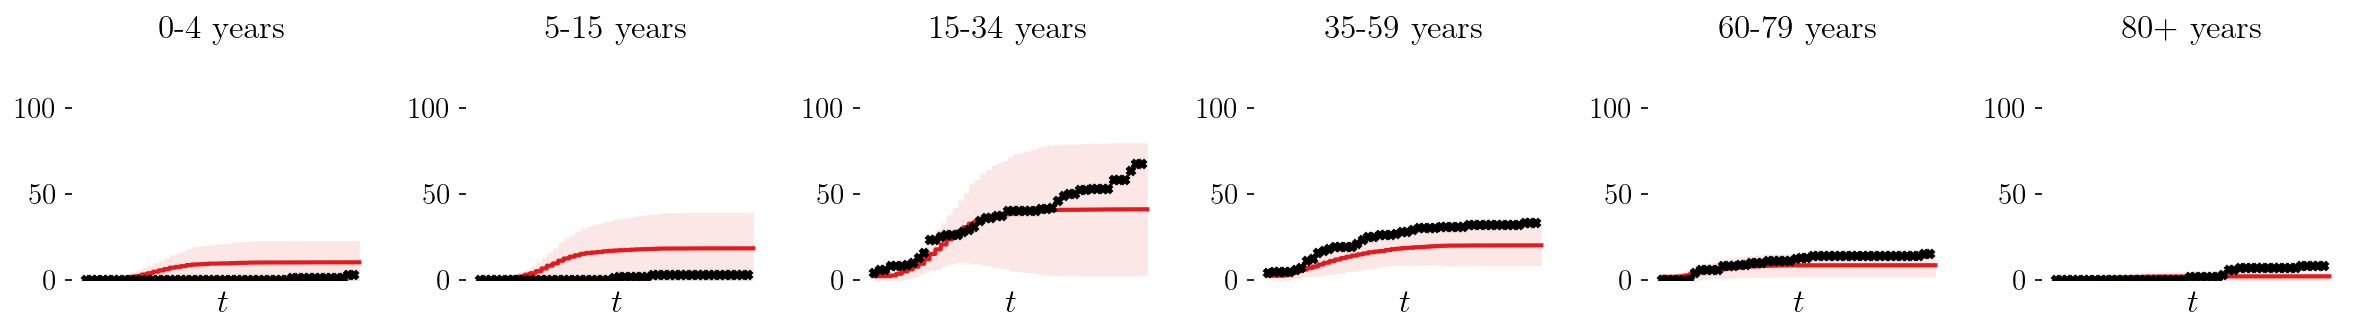

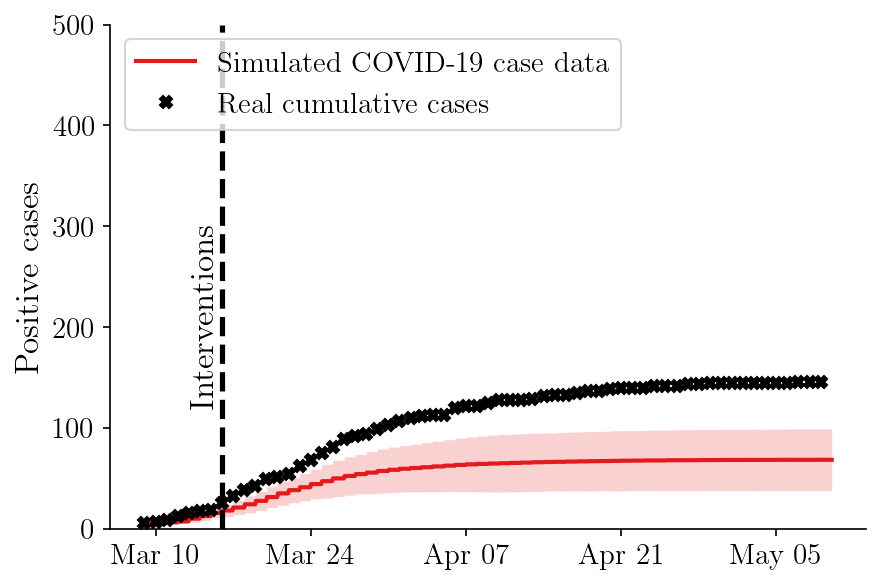

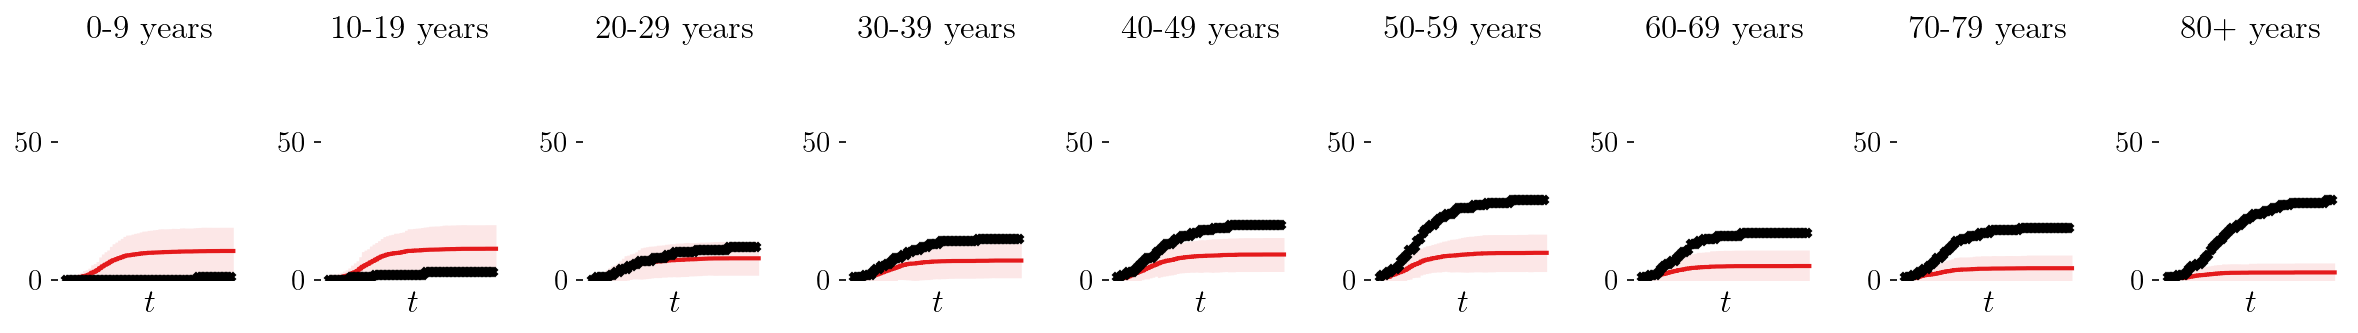

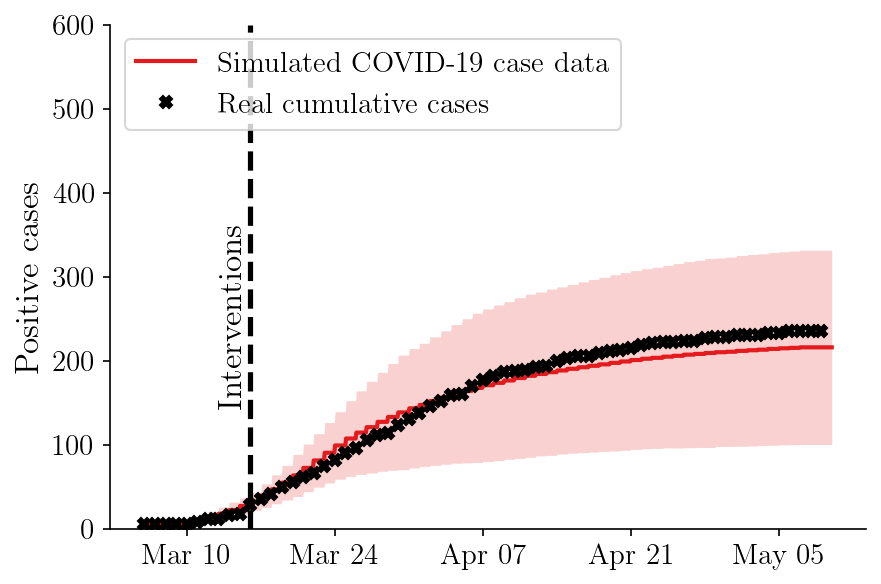

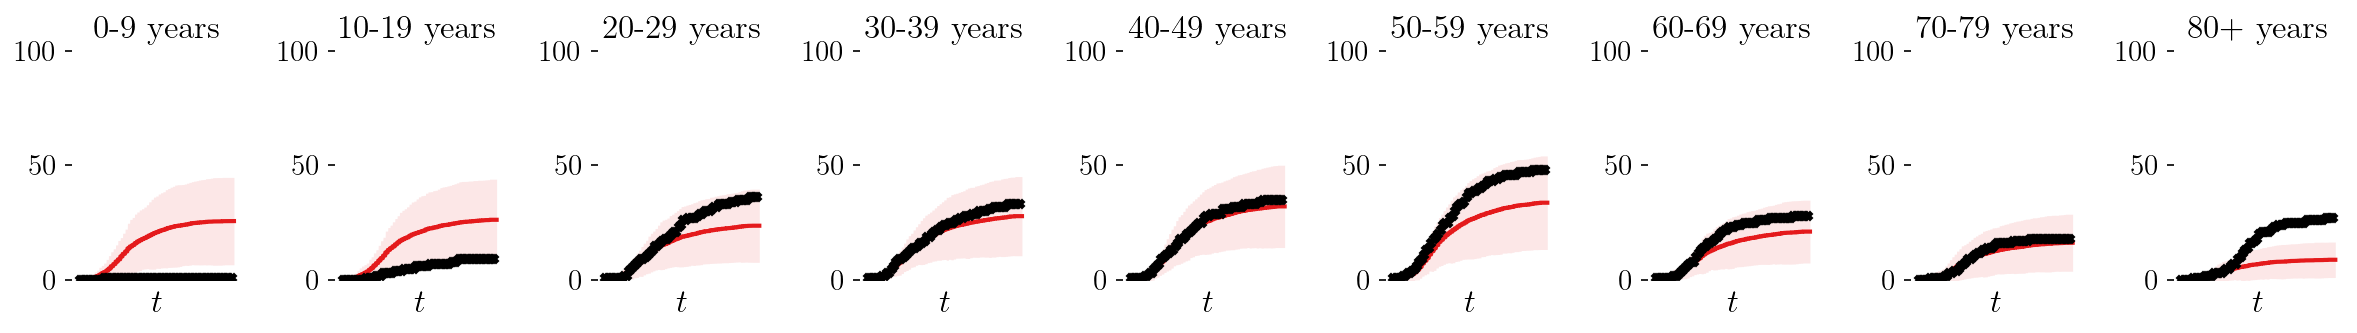

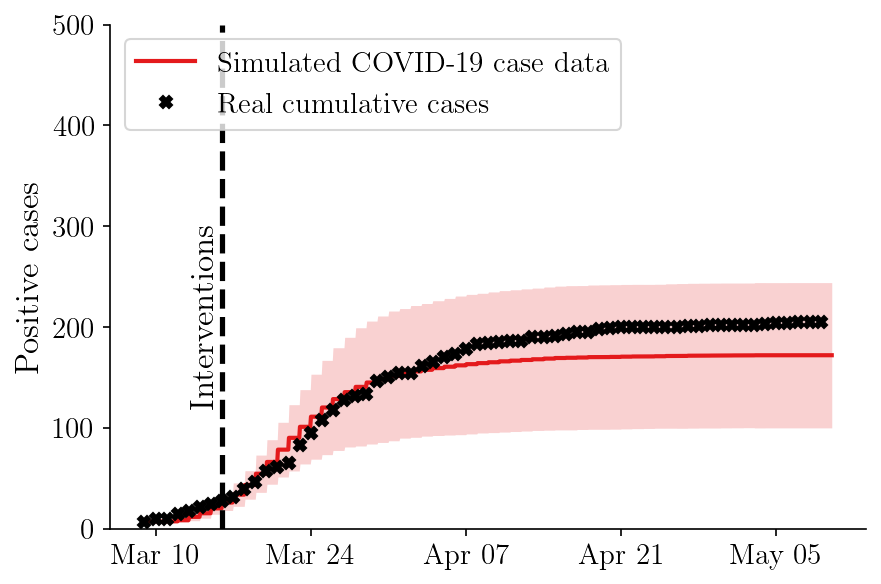

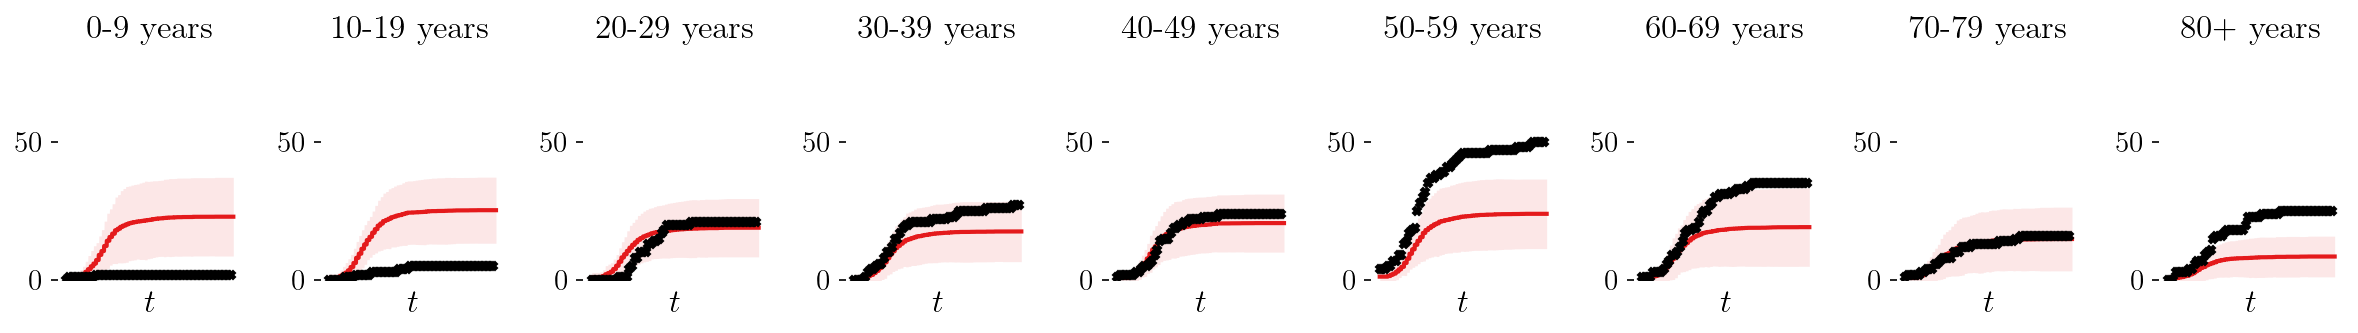

In [7]:
ymax_modelfit = {'GER': {'TU': 1200, 'KL': 800, 'RH': 1000, 'TR': 2000,},
                 'CH': {'VD': 2000, 'BE': 600, 'TI': 500, 'JU': 500,}}

for country, area in places:
    print(country, area)
    plot_multibeta_modelfit(country, area, ymax_modelfit)

## Calibration progress

In [6]:
def plot_calibration_progress(country, area, ymax):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    if area == 'TI':
        plots = {
            f'calibration-steps-{country}-{area}' : [
                Plot(label=f'Model prediction, iteration {k}', 
                    path=(f'calibration-steps-{country}-{area}/'
                          f'calibration-steps-{country}-{area}-iter={k}.pk')) for k in [0,4,11,35]
            ],
        }
    if area == 'TU':
        plots = {
            f'calibration-steps-{country}-{area}' : [
                Plot(label=f'Model prediction, iteration {k}', 
                    path=(f'calibration-steps-{country}-{area}/'
                          f'calibration-steps-{country}-{area}-iter={k}.pk')) for k in [0,2,18,38,48]
            ],
        }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # load simulations
        results = load_summary_list(paths)
        sims = get_properties(results, 'metadata')
        summaries = get_properties(results, 'summary')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days        
        
        mob_settings_paths = calibration_mob_paths[country][area][1]
        with open(mob_settings_paths, 'rb') as fp:
            mob_settings = pickle.load(fp)

        area_cases = collect_data_from_df(country=country,
             area=area,
             datatype='new',
             start_date_string=start_date,
             end_date_string=end_date)

        sim_cases = downsample_cases(area_cases, mob_settings)      # only downscaling due LK data for cities

        plotter.plot_positives_vs_target(
            paths, 
            labels,
            sim_cases.sum(axis=1),
            title='Calibration period',
            filename=plot_filename,
            figsize=(6, 4),
            start_date=start_date,
            errorevery=1, acc=1000,
            lockdown_label='Interventions',
            ymax=ymax[country][area],
            lockdown_at=days_until_lockdown,
            lockdown_label_y=ymax[country][area]/4
        )

        

Extracting data from summary: calibration-steps-GER-TU/calibration-steps-GER-TU-iter=0.pk
Data extraction successful.
Loaded previously extracted data.
Extracting data from summary: calibration-steps-GER-TU/calibration-steps-GER-TU-iter=2.pk
Data extraction successful.
Loaded previously extracted data.
Extracting data from summary: calibration-steps-GER-TU/calibration-steps-GER-TU-iter=18.pk
Data extraction successful.
Loaded previously extracted data.
Extracting data from summary: calibration-steps-GER-TU/calibration-steps-GER-TU-iter=38.pk
Data extraction successful.
Loaded previously extracted data.
Extracting data from summary: calibration-steps-GER-TU/calibration-steps-GER-TU-iter=48.pk
Data extraction successful.
Loaded previously extracted data.


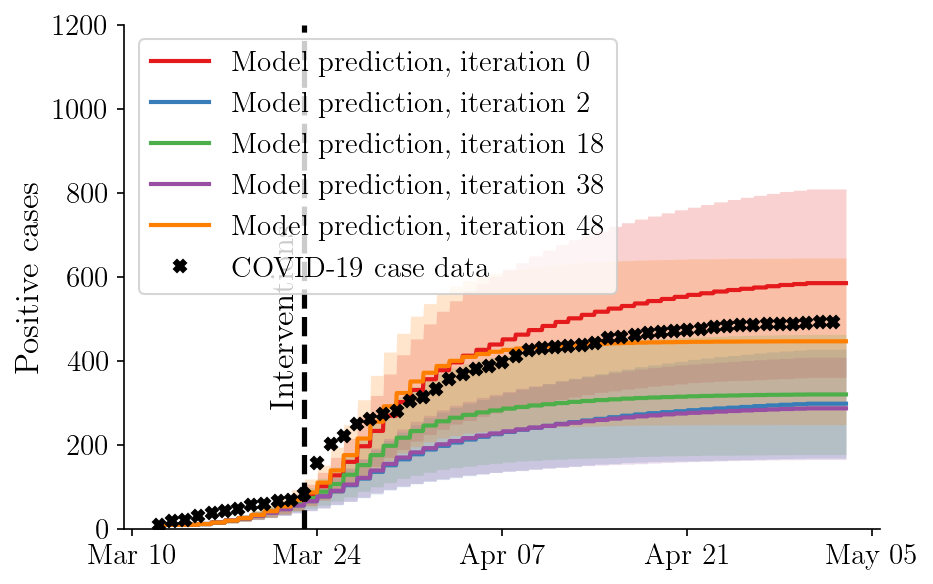

In [7]:
country, area = 'GER', 'TU'
#country, area = 'CH', 'TI'
plot_calibration_progress(country, area, ymax_modelfit)

## Proportion of infected

In [105]:
proportions = dict()
places.append(('GER', 'TR'))
for country, area in places:
    start_date = calibration_start_dates[country][area]
    start_date_lockdown = calibration_lockdown_dates[country]['start']
    end_date = calibration_lockdown_dates[country]['end']

    days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days        

    mob_settings_paths = calibration_mob_paths[country][area][0]
    with open(mob_settings_paths, 'rb') as fp:
        mob_settings = pickle.load(fp)

    area_cases = collect_data_from_df(country=country,
         area=area,
         datatype='new',
         start_date_string=start_date,
         end_date_string=end_date)

    sim_cases = downsample_cases(area_cases, mob_settings)      # only downscaling due LK data for cities
    total_cases = sim_cases.sum(axis=1)[-1]
    num_people = mob_settings['num_people_unscaled']
    downsample = mob_settings['downsample']

    proportions[area] = {'full': total_cases/num_people, 'downsampled': total_cases/num_people/downsample}

    print(country, area)
    print(f'Proportion of infected full scale: {total_cases/num_people*100}%')
    print(f'Proportion of infected downsampled: {total_cases/num_people*downsample*100}%')

GER TU
Proportion of infected full scale: 0.5422658096437171%
Proportion of infected downsampled: 5.4226580964371704%
GER RH
Proportion of infected full scale: 0.10632841052384107%
Proportion of infected downsampled: 1.0632841052384108%
GER KL
Proportion of infected full scale: 0.1239871976009919%
Proportion of infected downsampled: 1.2398719760099188%
CH TI
Proportion of infected full scale: 0.916329625884732%
Proportion of infected downsampled: 1.832659251769464%
CH BE
Proportion of infected full scale: 0.17564709135891055%
Proportion of infected downsampled: 1.7564709135891052%
CH JU
Proportion of infected full scale: 0.2792192756643376%
Proportion of infected downsampled: 2.7921927566433755%
GER TR
Proportion of infected full scale: 1.5371712199749763%
Proportion of infected downsampled: 7.685856099874881%
